In [1]:
# Data provided in the user's table
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Model": [
        "Resnet18 base", "Resnet18 + BS128", "Resnet18 + BS64", 
        "Resnet34", "squeeznet", "Resnet18 + ADAM", "Resnet 18 + LR1e-2", 
        "Resnet 18 + LR1e-4", "Resnet18 + Max_GRAD_NORM 0.5", "Resnet 18 + DELTA 1e-3"
    ],
    "Acc Test L1": [80.36, 80.89, 75.41, 80.38, 63.17, 65.81, 79.91, 80.17, 83.35, 85.80],
    "Acc Train L1": [92.58, 91.78, 91.81, 90.19, 73.90, 76.74, 92.08, 92.60, 93.48, 93.63],
    "Epsilon L1": [0.5, 0.49, 0.49, 0.49, 0.5, 0.49, 0.5, 0.5, 0.49, 0.49],
    
    "Acc Test L2": [84.11, 81.21, 81.88, 83.07, 80.13, 84.43, 76.99, 83.07, 82.86, 86.54],
    "Acc Train L2": [95.91, 94.78, 95.17, 94.96, 86.68, 94.53, 93.49, 95.57, 95.41, 95.69],
    "Epsilon L2": [3.99, 4.00, 4.04, 3.99, 4.03, 4.00, 3.99, 4.03, 4.00, 4.00],
    
    "Acc Test L3": [80.88, 83.37, 84.11, 82.48, 84.38, 83.26, 84.71, 83.24, 83.24, 84.49],
    "Acc Train L3": [96.13, 96.17, 95.73, 95.54, 85.22, 96.10, 95.17, 96.54, 95.75, 95.79],
    "Epsilon L3": [9.00, 9.00, 9.00, 9.00, 9.00, 9.00, 9.00, 9.00, 9.00, 9.00],

    "Time L1": [2392.24, 3882.28, 1560.89, 5176.87, 22.28, 3808.09, 1858.59, 1652.56, 1037.10, 3362.42],
    "Time L2": [2188.93, 3722.81, 2897.25, 7629.04, 22.73, 1748.01, 2493.27, 3042.72, 1223.82, 2801.20],
    "Time L3": [3279.22, 890.55, 6138.37, 6447.23, 57.54, 2057.86, 1322.70, 3516.22, 2923.50, 5708.05],

    "Epsilon Target L1": [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
    "Epsilon Target L2": [4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0],
    "Epsilon Target L3": [9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0],
    "Epsilon Achieved L1": [0.5, 0.49, 0.49, 0.49, 0.5, 0.49, 0.5, 0.5, 0.49, 0.49],
    "Epsilon Achieved L2": [3.99, 4.00, 4.04, 3.99, 4.03, 4.00, 3.99, 4.03, 4.00, 4.00],
    "Epsilon Achieved L3": [9.00, 9.00, 9.00, 9.00, 9.00, 9.00, 9.00, 9.00, 9.00, 9.00],
}
df = pd.DataFrame(data)

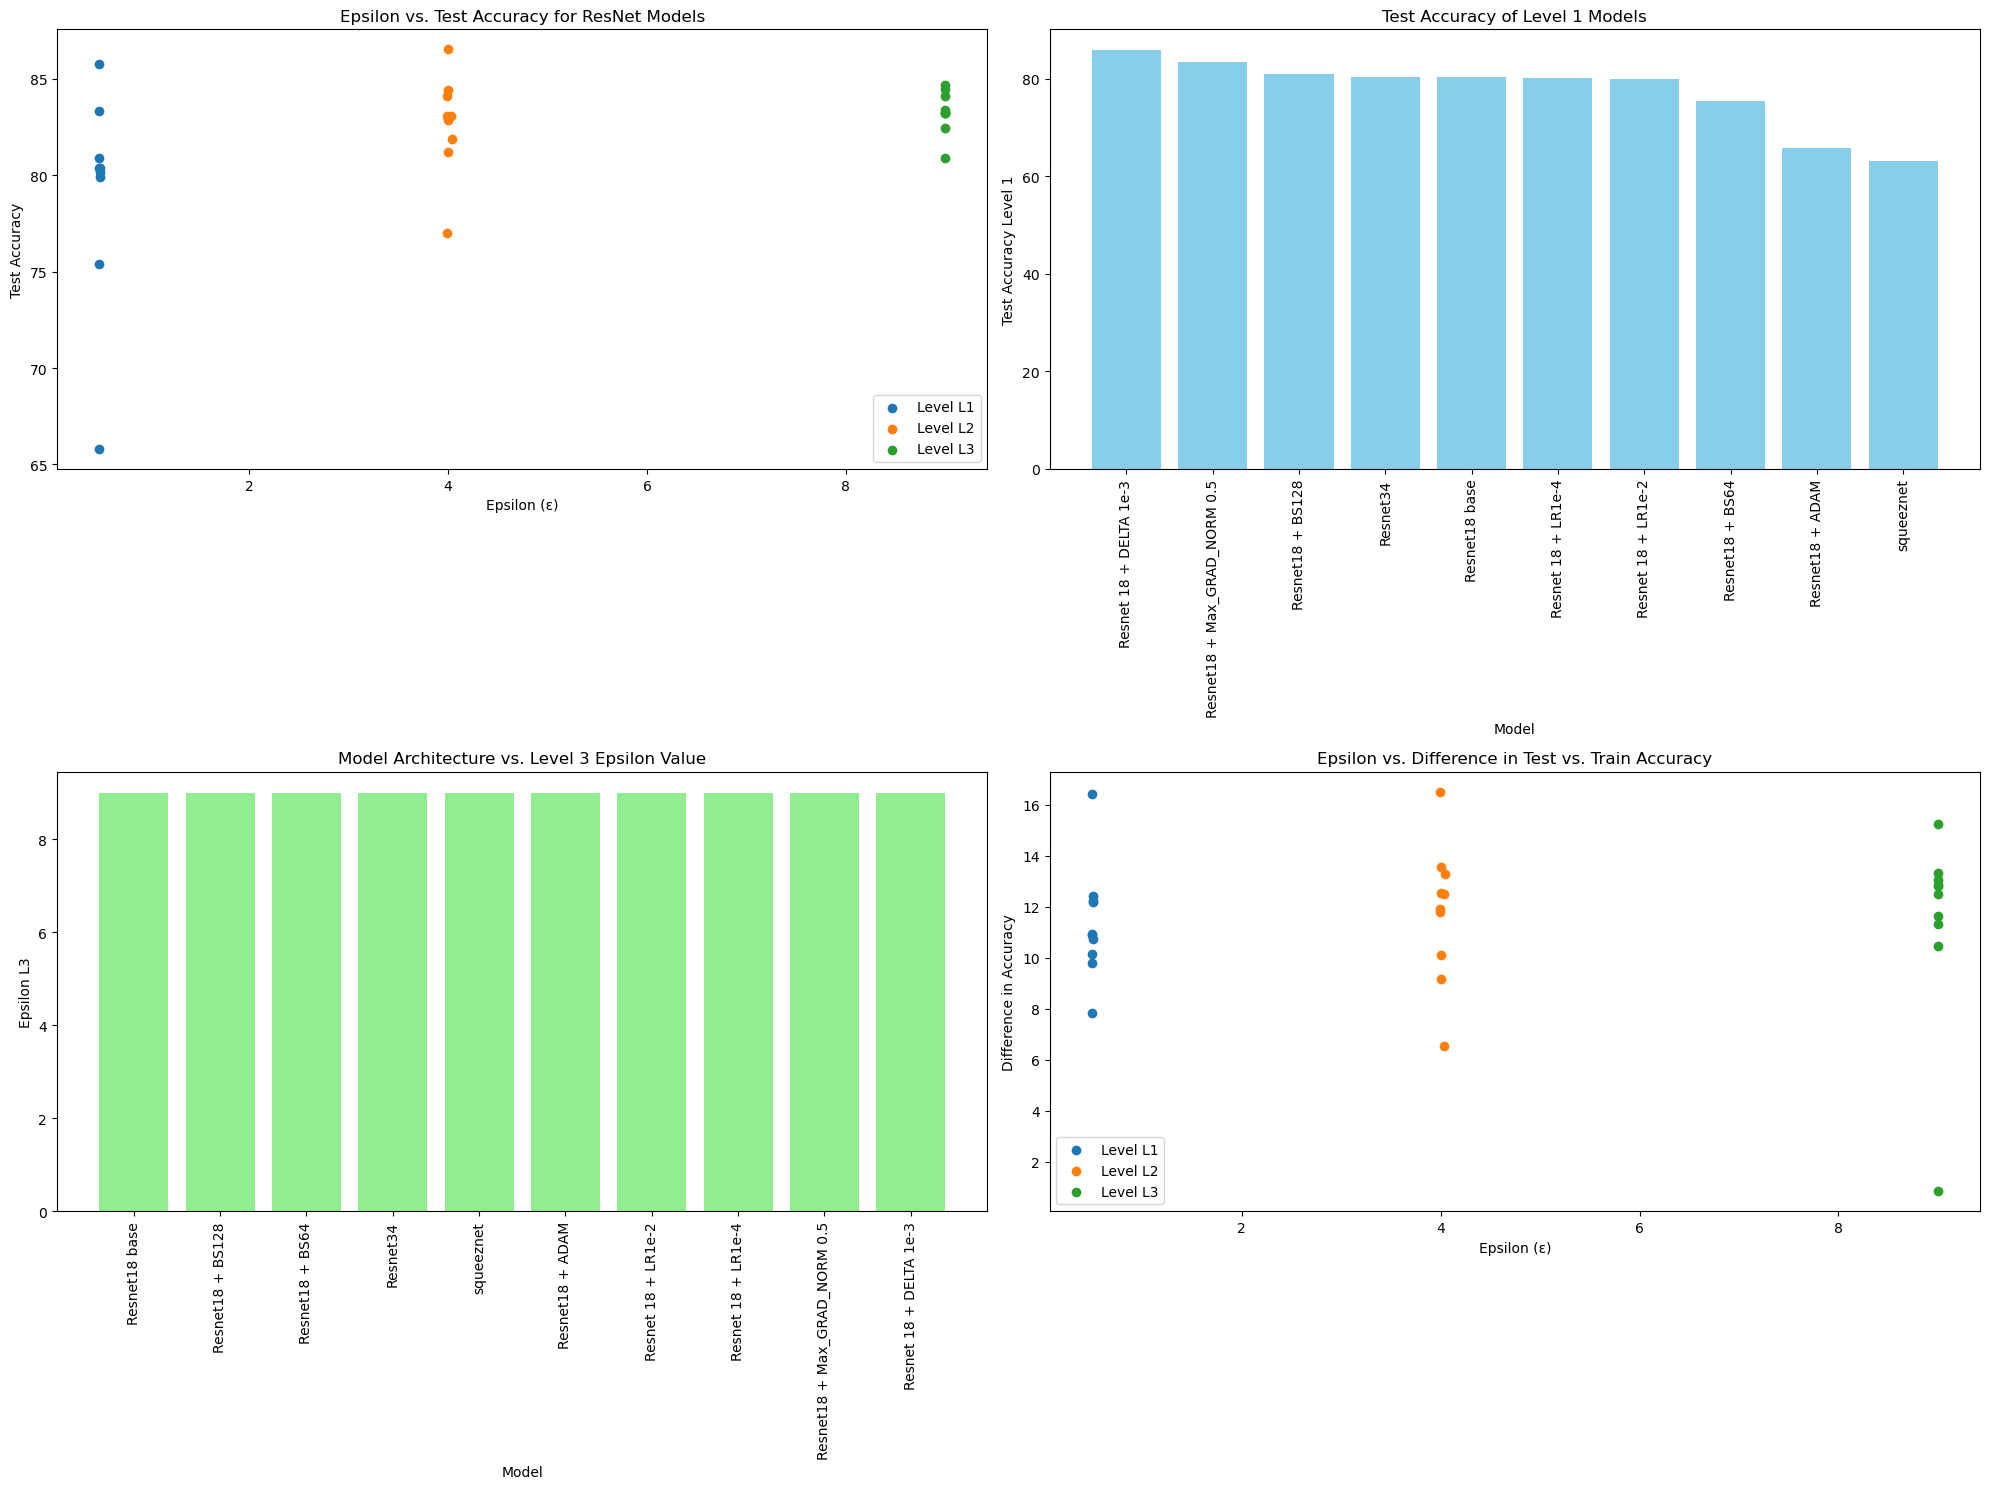

In [2]:

# Convert to DataFrame
df = pd.DataFrame(data)

# Let's start plotting the requested figures
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. How the epsilon influences the accuracy for the ResNet models
for level in ['L1', 'L2', 'L3']:
    resnet_models = df[df['Model'].str.contains('Resnet')]
    axes[0, 0].scatter(resnet_models[f'Epsilon {level}'], resnet_models[f'Acc Test {level}'], label=f'Level {level}')
axes[0, 0].set_title('Epsilon vs. Test Accuracy for ResNet Models')
axes[0, 0].set_xlabel('Epsilon (ε)')
axes[0, 0].set_ylabel('Test Accuracy')
axes[0, 0].legend()

# 2. Comparing all level 1 models for accuracy
level_1_models = df.sort_values(by='Acc Test L1', ascending=False)
axes[0, 1].bar(level_1_models['Model'], level_1_models['Acc Test L1'], color='skyblue')
axes[0, 1].set_title('Test Accuracy of Level 1 Models')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Test Accuracy Level 1')
axes[0, 1].tick_params(axis='x', rotation=90)

# 3. Plot how the model architecture influences the level 3 epsilon value
level_3_models = df.sort_values(by='Epsilon L3')
axes[1, 0].bar(level_3_models['Model'], level_3_models['Epsilon L3'], color='lightgreen')
axes[1, 0].set_title('Model Architecture vs. Level 3 Epsilon Value')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Epsilon L3')
axes[1, 0].tick_params(axis='x', rotation=90)

# 4. How the epsilon influences the differences in test vs. train accuracy
for level in ['L1', 'L2', 'L3']:
    df[f'Diff Acc {level}'] = df[f'Acc Train {level}'] - df[f'Acc Test {level}']
    axes[1, 1].scatter(df[f'Epsilon {level}'], df[f'Diff Acc {level}'], label=f'Level {level}')

axes[1, 1].set_title('Epsilon vs. Difference in Test vs. Train Accuracy')
axes[1, 1].set_xlabel('Epsilon (ε)')
axes[1, 1].set_ylabel('Difference in Accuracy')
axes[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


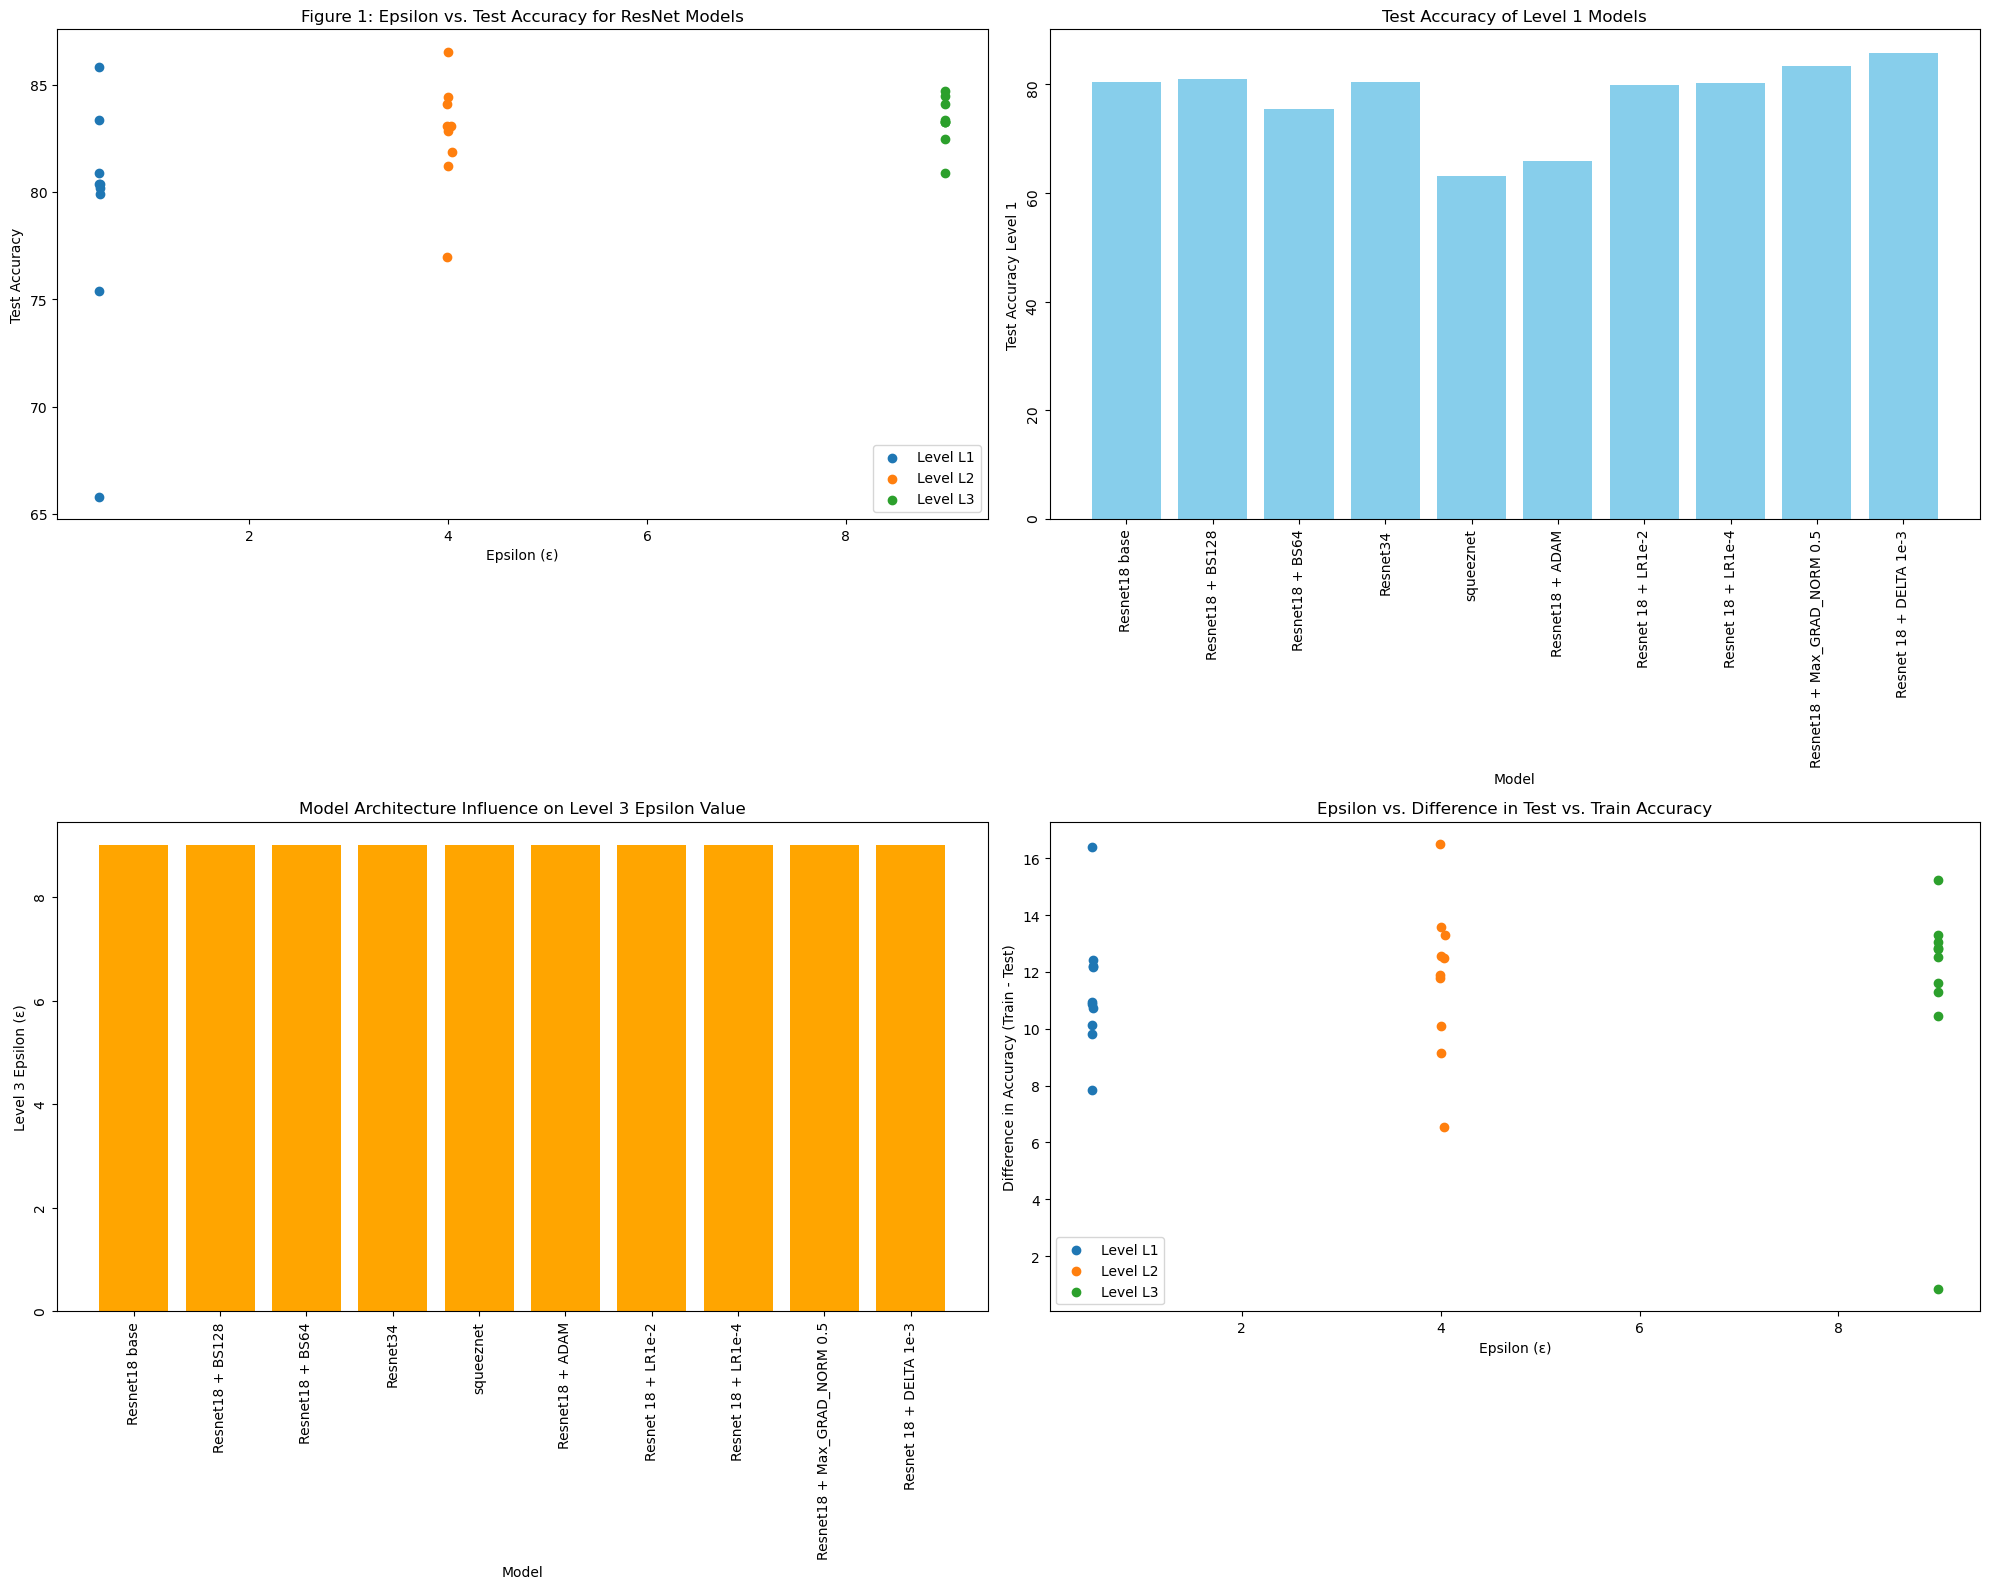

In [3]:


df = pd.DataFrame(data)

# 1. How the epsilon influences the accuracy for the ResNet models
# Filtering out only ResNet models from the dataset for this plot
resnet_filter = df['Model'].str.contains('Resnet')
resnet_df = df[resnet_filter]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(20, 16), tight_layout=True)

# Epsilon influence on accuracy for ResNet models
for i, level in enumerate(['L1', 'L2', 'L3'], start=1):
    axes[0, 0].scatter(resnet_df[f'Epsilon {level}'], resnet_df[f'Acc Test {level}'], label=f'Level {level}')
axes[0, 0].set_title('Figure 1: Epsilon vs. Test Accuracy for ResNet Models')
axes[0, 0].set_xlabel('Epsilon (ε)')
axes[0, 0].set_ylabel('Test Accuracy')
axes[0, 0].legend()

# 2. Comparing all level 1 models for accuracy
axes[0, 1].bar(df['Model'], df['Acc Test L1'], color='skyblue')
axes[0, 1].set_title('Test Accuracy of Level 1 Models')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Test Accuracy Level 1')
axes[0, 1].tick_params(labelrotation=90)

# 3. Model architecture influence on level 3 epsilon value
axes[1, 0].bar(df['Model'], df['Epsilon L3'], color='orange')
axes[1, 0].set_title('Model Architecture Influence on Level 3 Epsilon Value')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Level 3 Epsilon (ε)')
axes[1, 0].tick_params(labelrotation=90)

# 4. Epsilon influence on differences in test vs. train accuracy
for i, level in enumerate(['L1', 'L2', 'L3'], start=1):
    # Calculate difference between train and test accuracy for each level
    df[f'Diff Acc {level}'] = df[f'Acc Train {level}'] - df[f'Acc Test {level}']
    axes[1, 1].scatter(df[f'Epsilon {level}'], df[f'Diff Acc {level}'], label=f'Level {level}')

axes[1, 1].set_title('Epsilon vs. Difference in Test vs. Train Accuracy')
axes[1, 1].set_xlabel('Epsilon (ε)')
axes[1, 1].set_ylabel('Difference in Accuracy (Train - Test)')
axes[1, 1].legend()

# Show all plots
plt.show()


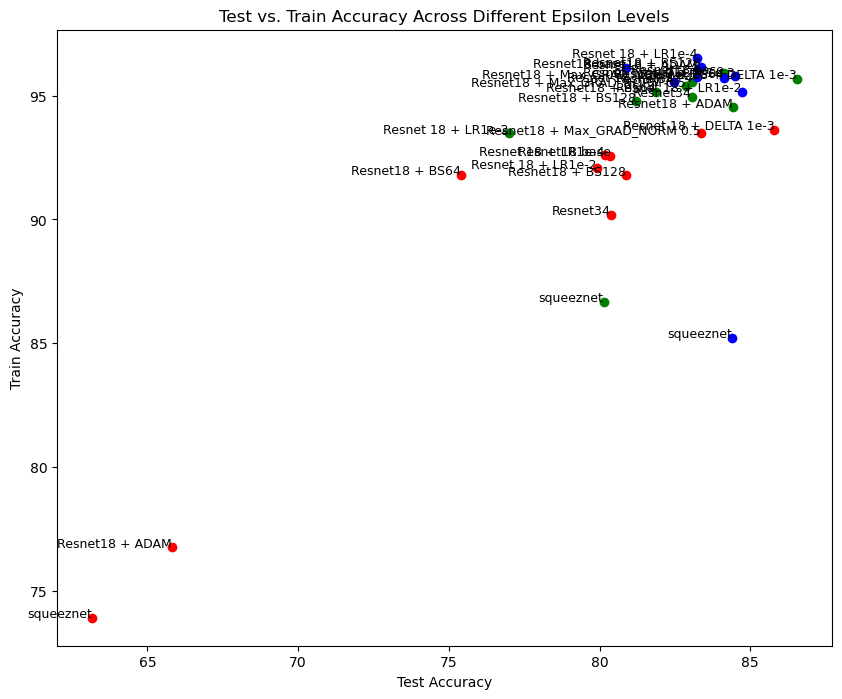

In [4]:
# Plotting Epsilon vs. Difference in Test vs. Train Accuracy with the new specifications
fig, ax = plt.subplots(figsize=(10, 8))

# Defining colors for each level
colors = ['red', 'green', 'blue']
levels = ['L1', 'L2', 'L3']

# Plotting each level with different colors and annotations
for color, level in zip(colors, levels):
    for i in df.index:
        ax.scatter(df[f'Acc Test {level}'][i], df[f'Acc Train {level}'][i], color=color, label=f'{level} - {df["Model"][i]} (ε={df[f"Epsilon {level}"][i]})')
        #ax.text(df[f'Acc Test {level}'][i], df[f'Acc Train {level}'][i], f'{df["Model"][i]} (ε={df[f"Epsilon {level}"][i]})', fontsize=9, ha='right')
        ax.text(df[f'Acc Test {level}'][i], df[f'Acc Train {level}'][i], f'{df["Model"][i]}', fontsize=9, ha='right')

# Setting the legend to only show one label per level
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#ax.legend(by_label.values(), by_label.keys())

# Setting titles and labels
ax.set_title('Test vs. Train Accuracy Across Different Epsilon Levels')
ax.set_xlabel('Test Accuracy')
ax.set_ylabel('Train Accuracy')

# Show plot
plt.show()


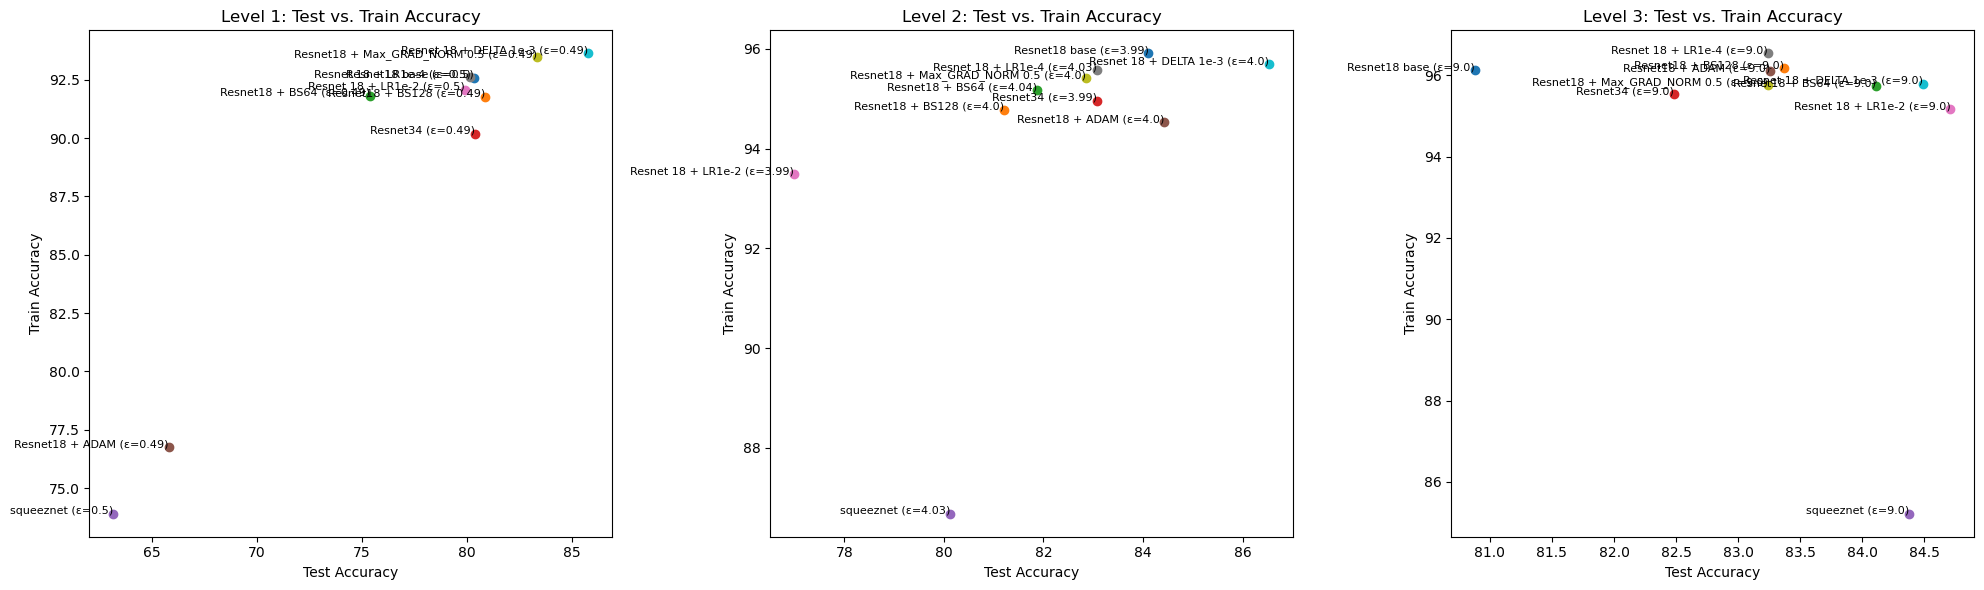

In [5]:
# Plotting separate plots for each level

# Creating figure and axes objects for subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=False, sharey=False)

# Looping through each level and creating a separate plot
for idx, level in enumerate(levels):
    # Selecting the corresponding axis for the subplot
    ax = axes[idx]
    
    # Plotting each point with the model description and exact epsilon value as the label
    for i in df.index:
        ax.scatter(df[f'Acc Test {level}'][i], df[f'Acc Train {level}'][i], label=f'{df["Model"][i]} (ε={df[f"Epsilon {level}"][i]})')
        ax.text(df[f'Acc Test {level}'][i], df[f'Acc Train {level}'][i], f'{df["Model"][i]} (ε={df[f"Epsilon {level}"][i]})', fontsize=8, ha='right')
    
    # Setting the title for each subplot based on the level
    ax.set_title(f'Level {level[-1]}: Test vs. Train Accuracy')
    ax.set_xlabel('Test Accuracy')
    ax.set_ylabel('Train Accuracy')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


C:\Users\m1choelz\AppData\Local\Temp\ipykernel_44744\66672154.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('hsv', df.shape[0])


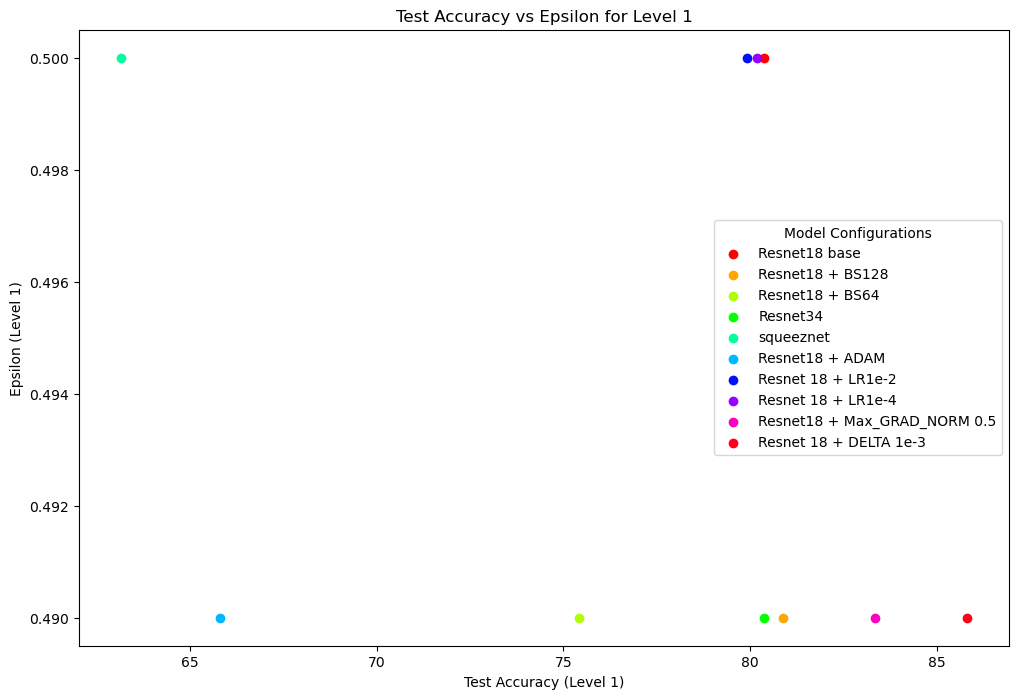

In [6]:
# Create the plot with a legend, where each point has a different color
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a unique color for each model configuration using a colormap
color_map = plt.cm.get_cmap('hsv', df.shape[0])

# Scatter plot for Test Accuracy vs Epsilon for Level 1, with unique colors and labels
for i, row in df.iterrows():
    ax.scatter(row['Acc Test L1'], row['Epsilon L1'], color=color_map(i), label=row['Model'])

# Create legend
ax.legend(title='Model Configurations')

# Setting the titles and labels
ax.set_title('Test Accuracy vs Epsilon for Level 1')
ax.set_xlabel('Test Accuracy (Level 1)')
ax.set_ylabel('Epsilon (Level 1)')

# Show plot with legend
plt.show()


In [7]:
# Data preparation
dataL1 = {
    "Model": [
        "Resnet18 base", "Resnet18 + BS128", "Resnet18 + BS64", 
        "Resnet34", "squeeznet", "Resnet18 + ADAM", "Resnet 18 + LR1e-2", 
        "Resnet 18 + LR1e-4", "Resnet18 + Max_GRAD_NORM 0.5", "Resnet 18 + DELTA 1e-3"
    ],
    "Acc Test L1": [80.36, 80.89, 75.41, 80.38, 63.17, 65.81, 79.91, 80.17, 83.35, 85.80],
    "Epsilon L1": [0.5, 0.49, 0.49, 0.49, 0.5, 0.49, 0.5, 0.5, 0.49, 0.49],
}
df1 = pd.DataFrame(dataL1)

C:\Users\m1choelz\AppData\Local\Temp\ipykernel_44744\3982014289.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('hsv', df.shape[0])


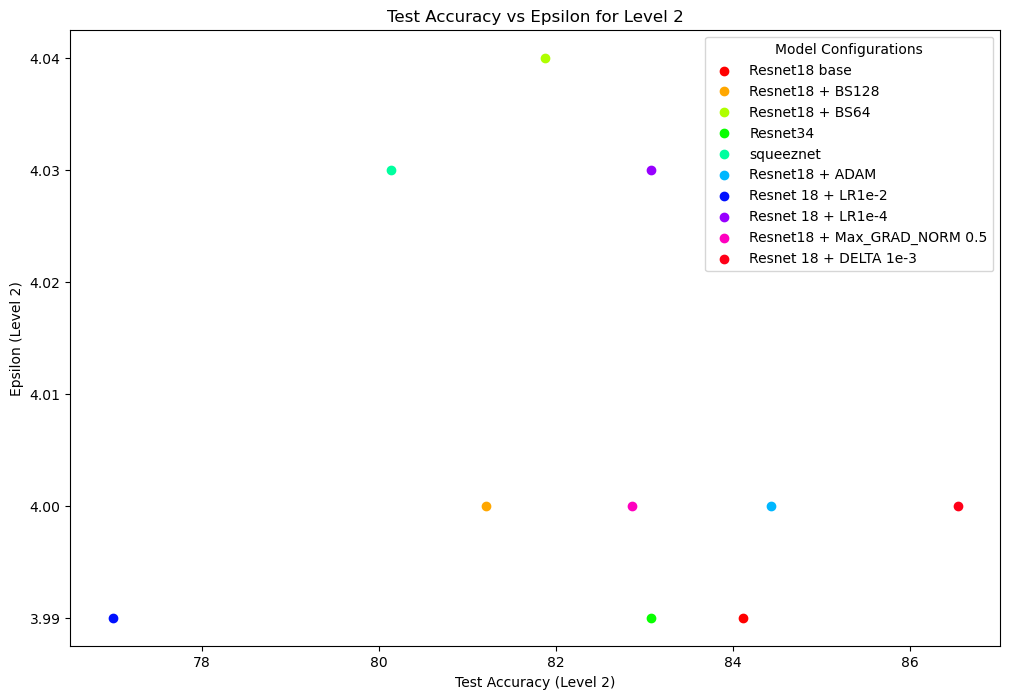

In [8]:
# Create the plot with a legend, where each point has a different color
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a unique color for each model configuration using a colormap
color_map = plt.cm.get_cmap('hsv', df.shape[0])

# Scatter plot for Test Accuracy vs Epsilon for Level 1, with unique colors and labels
for i, row in df.iterrows():
    ax.scatter(row['Acc Test L2'], row['Epsilon L2'], color=color_map(i), label=row['Model'])

# Create legend
ax.legend(title='Model Configurations')

# Setting the titles and labels
ax.set_title('Test Accuracy vs Epsilon for Level 2')
ax.set_xlabel('Test Accuracy (Level 2)')
ax.set_ylabel('Epsilon (Level 2)')

# Show plot with legend
plt.show()

C:\Users\m1choelz\AppData\Local\Temp\ipykernel_44744\503293771.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('hsv', df.shape[0])


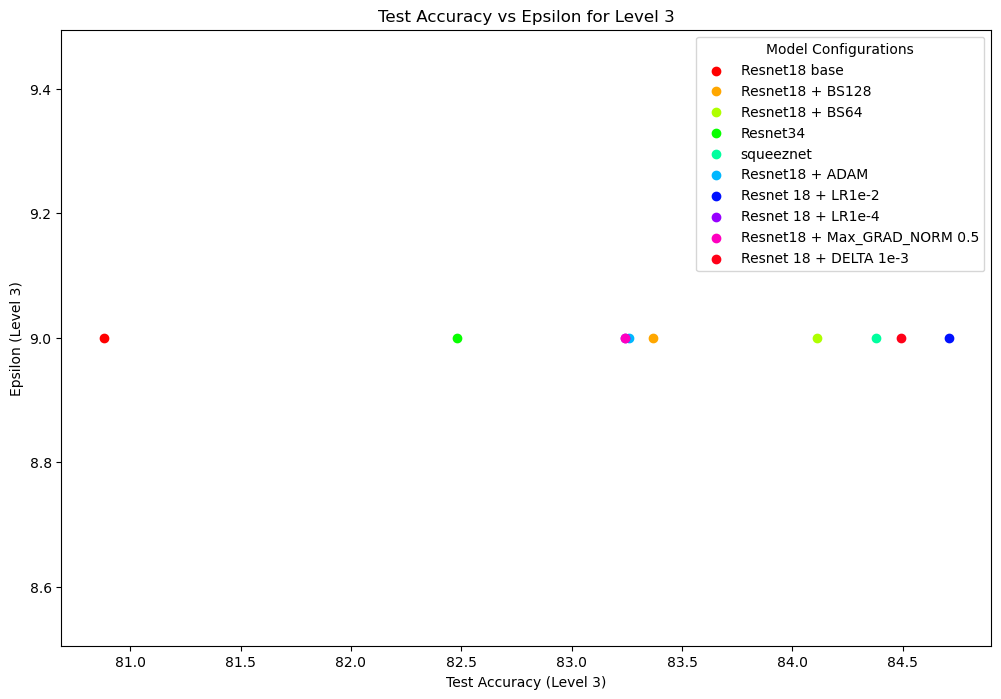

In [9]:
# Create the plot with a legend, where each point has a different color
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a unique color for each model configuration using a colormap
color_map = plt.cm.get_cmap('hsv', df.shape[0])

# Scatter plot for Test Accuracy vs Epsilon for Level 1, with unique colors and labels
for i, row in df.iterrows():
    ax.scatter(row['Acc Test L3'], row['Epsilon L3'], color=color_map(i), label=row['Model'])

# Create legend
ax.legend(title='Model Configurations')

# Setting the titles and labels
ax.set_title('Test Accuracy vs Epsilon for Level 3')
ax.set_xlabel('Test Accuracy (Level 3)')
ax.set_ylabel('Epsilon (Level 3)')

# Show plot with legend
plt.show()

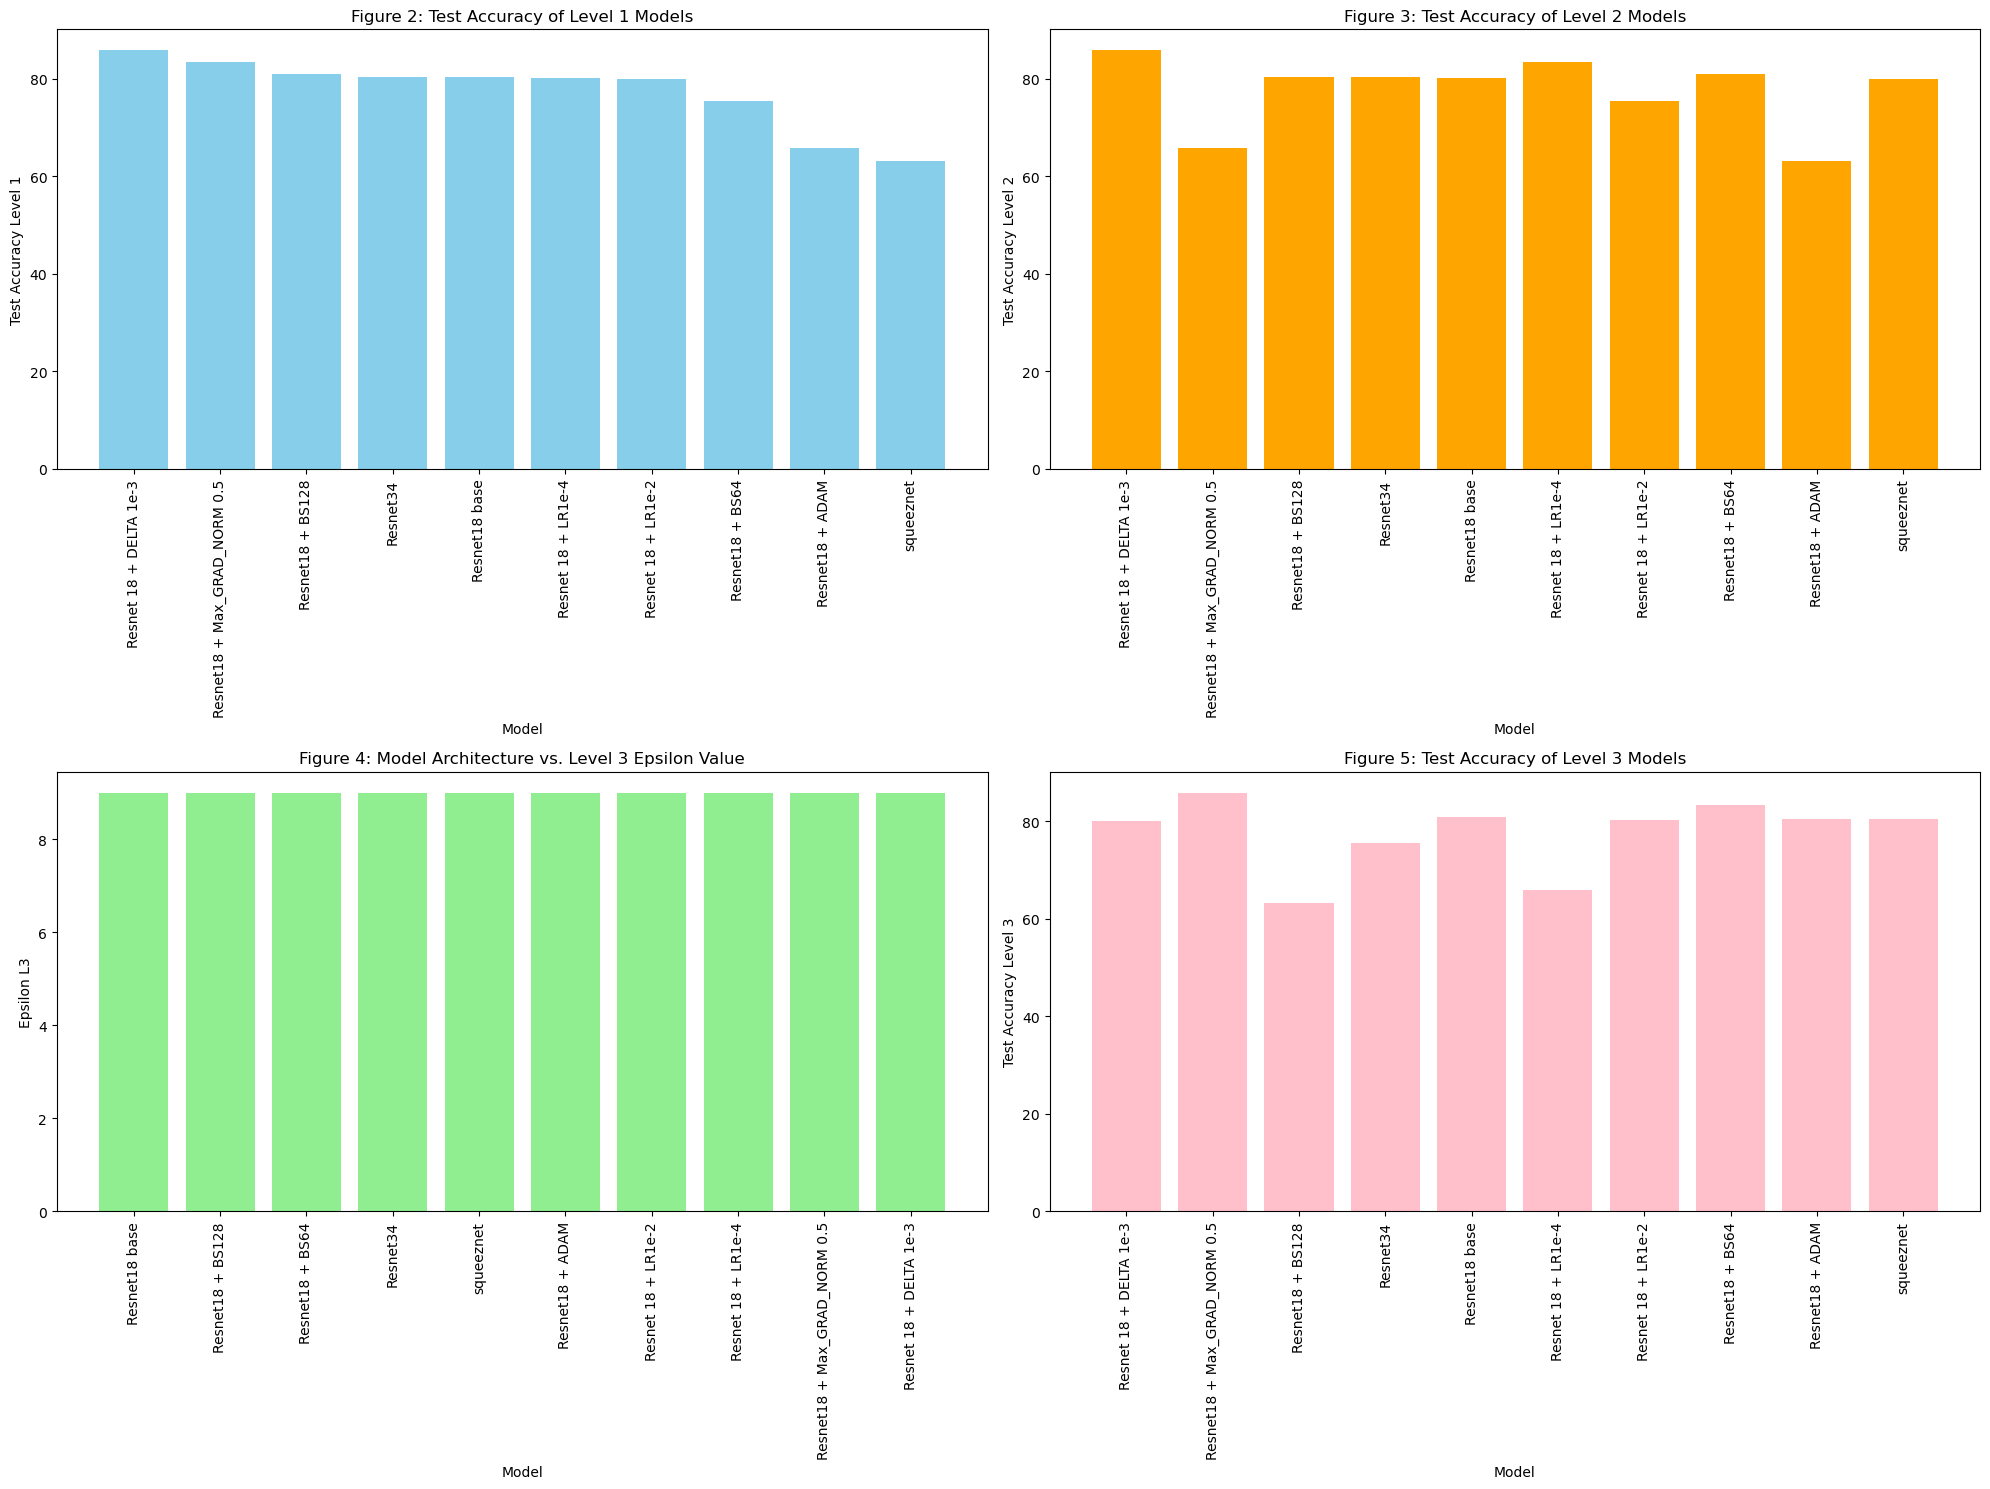

In [10]:
import matplotlib.pyplot as plt
import pandas as pd



# Convert to DataFrame
df = pd.DataFrame(data)

# Let's start plotting the requested figures
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Comparing all level 1 models for accuracy
level_1_models = df.sort_values(by='Acc Test L1', ascending=False)
axes[0, 0].bar(level_1_models['Model'], level_1_models['Acc Test L1'], color='skyblue')
axes[0, 0].set_title('Figure 2: Test Accuracy of Level 1 Models')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('Test Accuracy Level 1')
axes[0, 0].tick_params(axis='x', rotation=90)

# 2. Comparing all level 2 models for accuracy
level_2_models = df.sort_values(by='Acc Test L2', ascending=False)
axes[0, 1].bar(level_1_models['Model'], level_2_models['Acc Test L1'], color='orange')
axes[0, 1].set_title('Figure 3: Test Accuracy of Level 2 Models')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('Test Accuracy Level 2')
axes[0, 1].tick_params(axis='x', rotation=90)

# 3. Plot how the model architecture influences the level 3 epsilon value
level_3_models = df.sort_values(by='Epsilon L3')
axes[1, 0].bar(level_3_models['Model'], level_3_models['Epsilon L3'], color='lightgreen')
axes[1, 0].set_title('Figure 4: Model Architecture vs. Level 3 Epsilon Value')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('Epsilon L3')
axes[1, 0].tick_params(axis='x', rotation=90)

# 4. Comparing all level 3 models for accuracy
level_3_models = df.sort_values(by='Acc Test L3', ascending=False)
axes[1, 1].bar(level_1_models['Model'], level_3_models['Acc Test L1'], color='pink')
axes[1, 1].set_title('Figure 5: Test Accuracy of Level 3 Models')
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Test Accuracy Level 3')
axes[1, 1].tick_params(axis='x', rotation=90)


# Adjust layout
plt.tight_layout()
plt.show()


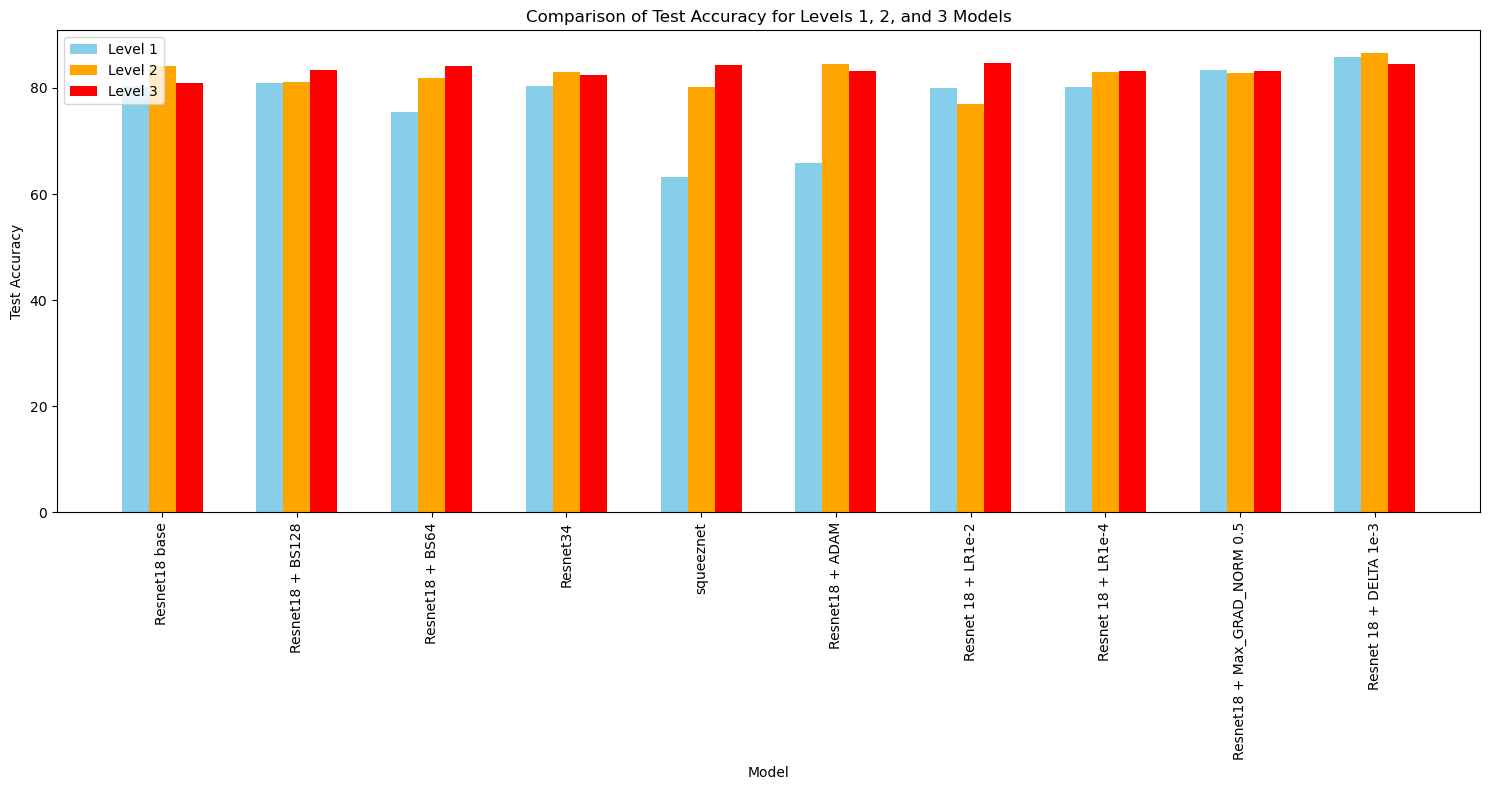

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(data)

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(15, 8))

# Extract the model names
model_names = df["Model"]

# Plot the test accuracy for all levels side by side
x = range(len(model_names))
width = 0.2

plt.bar(x, df["Acc Test L1"], width=width, label="Level 1", align="center", color='skyblue')
plt.bar([i + width for i in x], df["Acc Test L2"], width=width, label="Level 2", align="center", color='orange')
plt.bar([i + 2*width for i in x], df["Acc Test L3"], width=width, label="Level 3", align="center", color='red')

# Set x-axis labels and tick rotation
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.title("Comparison of Test Accuracy for Levels 1, 2, and 3 Models")
plt.xticks([i + width for i in x], model_names, rotation=90)
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()


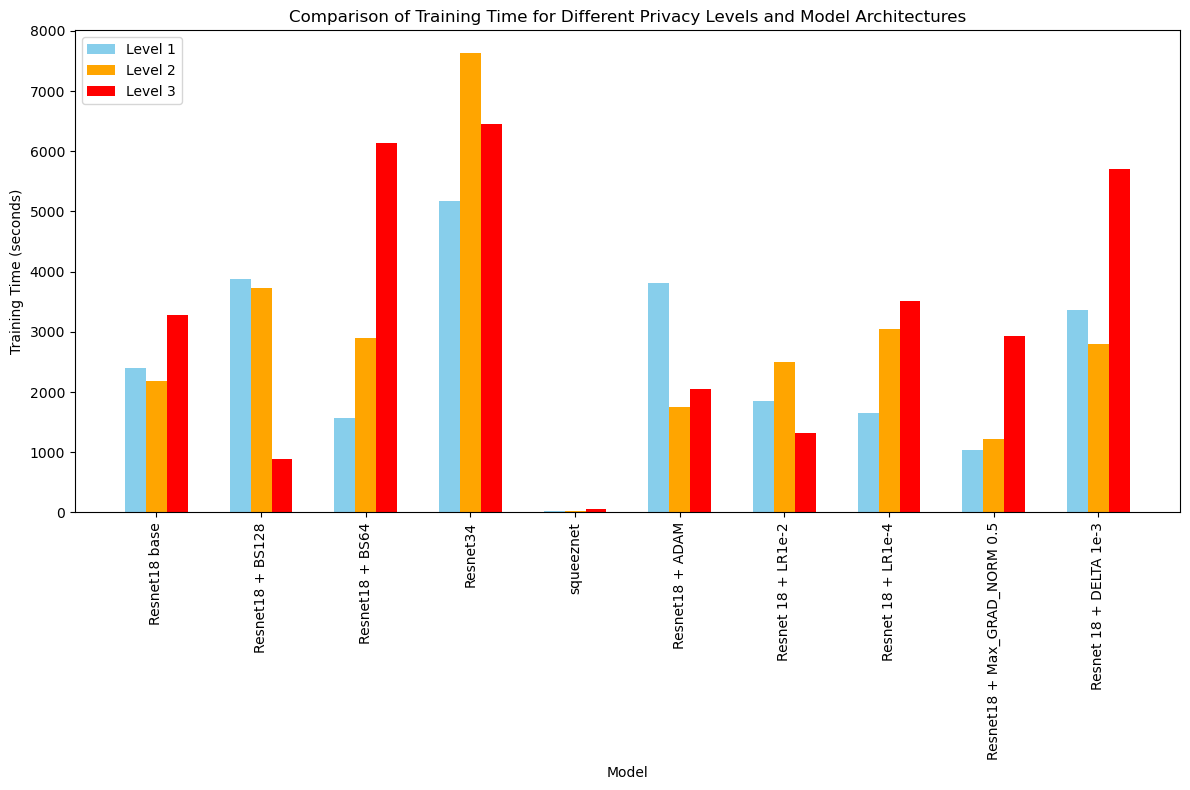

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(data)

# Create a figure and plot the training times
fig, ax = plt.subplots(figsize=(12, 8))

# Set the x-axis labels
model_names = df["Model"]
x = range(len(model_names))

# Plot training times for each level
plt.bar(x, df["Time L1"], width=0.2, label="Level 1", align="center", color='skyblue')
plt.bar([i + 0.2 for i in x], df["Time L2"], width=0.2, label="Level 2", align="center", color='orange')
plt.bar([i + 0.4 for i in x], df["Time L3"], width=0.2, label="Level 3", align="center", color='red')

# Set labels and title
plt.xlabel("Model")
plt.ylabel("Training Time (seconds)")
plt.title("Comparison of Training Time for Different Privacy Levels and Model Architectures")
plt.xticks([i + 0.2 for i in x], model_names, rotation=90)
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()


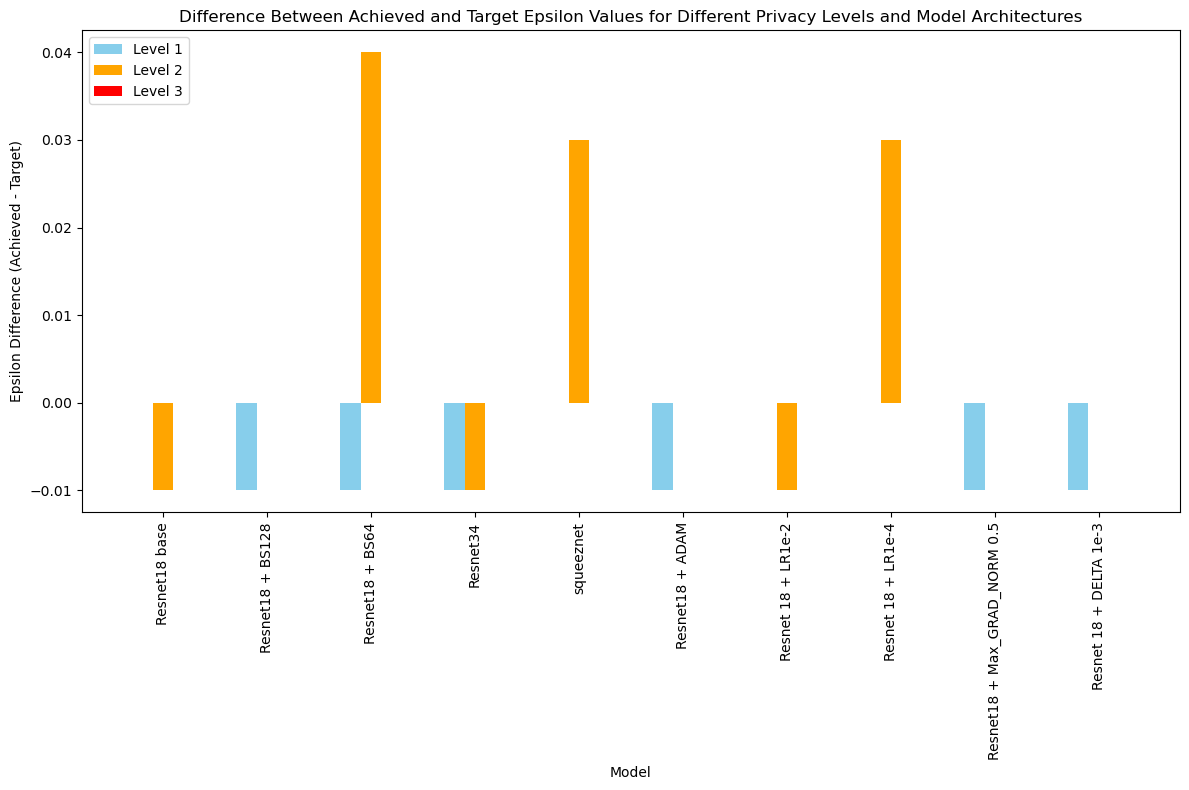

In [13]:
import matplotlib.pyplot as plt
import pandas as pd



# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate the differences for each level
diff_l1 = [a - b for a, b in zip(df["Epsilon Achieved L1"], df["Epsilon Target L1"])]
diff_l2 = [a - b for a, b in zip(df["Epsilon Achieved L2"], df["Epsilon Target L2"])]
diff_l3 = [a - b for a, b in zip(df["Epsilon Achieved L3"], df["Epsilon Target L3"])]

# Create a figure and plot the difference between achieved and target epsilon values
fig, ax = plt.subplots(figsize=(12, 8))

# Set the x-axis labels
model_names = df["Model"]
x = range(len(model_names))

# Plot the differences for each level
plt.bar(x, diff_l1, width=0.2, label="Level 1", align="center", color='skyblue')
plt.bar([i + 0.2 for i in x], diff_l2, width=0.2, label="Level 2", align="center", color='orange')
plt.bar([i + 0.4 for i in x], diff_l3, width=0.2, label="Level 3", align="center", color='red')

# Set labels and title
plt.xlabel("Model")
plt.ylabel("Epsilon Difference (Achieved - Target)")
plt.title("Difference Between Achieved and Target Epsilon Values for Different Privacy Levels and Model Architectures")
plt.xticks([i + 0.2 for i in x], model_names, rotation=90)
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()
